#Cotton Yield Prediction

In [1]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
!pip install tensorflow==2.12.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 33.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gas

In [ ]:
!pip install tensorflow-gpu==2.12.0 --use-feature=2020-resolver --index-url=https://pypi.org/simple



Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

option --use-feature: invalid choice: '2020-resolver' (choose from 'fast-deps', 'truststore', 'no-binary-enable-wheel-cache')


In [ ]:
#GPU SpecSheet
!nvidia-smi

Mon Feb 26 04:46:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#### Importing the Libraries and the dataset

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

#from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2

from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# re-size all the images and importing the dataset from Google Drive
IMAGE_SIZE = [224, 224]

# importing the dataset
train_path = '/content/drive/My Drive/dataset/train'
valid_path = '/content/drive/My Drive/dataset/test'

In [ ]:
import tensorflow as tf

inceptionv3=tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=IMAGE_SIZE + [3]
    )

In [ ]:
# don't train existing weights
for layer in inceptionv3.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/dataset/train/*')
folders

['/content/drive/My Drive/dataset/train/c_plant',
 '/content/drive/My Drive/dataset/train/c_boll',
 '/content/drive/My Drive/dataset/train/A1_plant',
 '/content/drive/My Drive/dataset/train/A1_boll']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inceptionv3.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inceptionv3.input, outputs=prediction)

In [ ]:
# Model Structure
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [ ]:
# Assigning cost function and optimizer  to the Model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 204 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 49 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
7/7 [==============================] - 72s 9s/step - loss: 14.5299 - accuracy: 0.3922 - val_loss: 13.2874 - val_accuracy: 0.1837
Epoch 2/20
7/7 [==============================] - 30s 4s/step - loss: 8.4213 - accuracy: 0.5490 - val_loss: 9.8233 - val_accuracy: 0.5306
Epoch 3/20
7/7 [==============================] - 30s 4s/step - loss: 5.8070 - accuracy: 0.7549 - val_loss: 2.0276 - val_accuracy: 0.6327
Epoch 4/20
7/7 [==============================] - 30s 4s/step - loss: 1.9621 - accuracy: 0.7696 - val_loss: 2.2922 - val_accuracy: 0.6531
Epoch 5/20
7/7 [==============================] - 30s 4s/step - loss: 1.1039 - accuracy: 0.8480 - val_loss: 2.0910 - val_accuracy: 0.5918
Epoch 6/20
7/7 [==============================] - 30s 4s/step - loss: 0.6198 - accuracy: 0.8873 - val_loss: 2.4098 - val_accuracy: 0.5510
Epoch 7/20
7/7 [==============================] - 30s 4s/step - loss: 0.3899 - accuracy: 0.9363 - val_loss: 2.5898 - val_accuracy: 0.6122
Epoch 8/20
7/7 [================

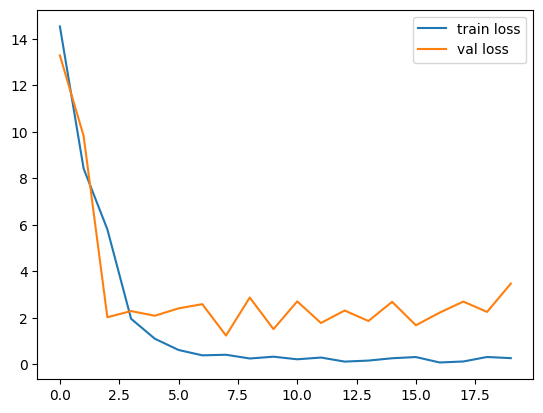

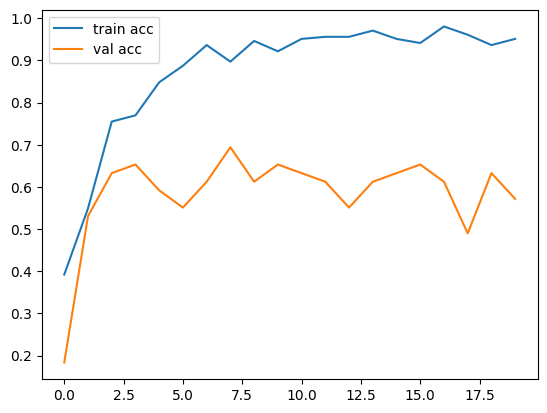

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('CottonModel.h5')

In [ ]:
y_pred = model.predict(test_set)
y_pred

2/2 [==============================] - 5s 2s/step


array([[2.37190432e-12, 9.99998391e-01, 1.70164525e-11, 1.55012356e-06],
       [1.88975571e-12, 9.99990642e-01, 6.56261920e-11, 9.31891464e-06],
       [1.60368748e-14, 9.99999940e-01, 1.01782038e-12, 1.45232706e-11],
       [6.05095238e-13, 9.99999940e-01, 3.37869516e-14, 5.23396493e-10],
       [2.02313415e-03, 9.97976899e-01, 5.57099811e-10, 2.79953513e-12],
       [3.16800676e-13, 9.98895049e-01, 4.30886965e-10, 1.10494706e-03],
       [1.33956847e-11, 9.99992788e-01, 7.17791181e-06, 1.87841529e-08],
       [1.70544717e-10, 9.99999940e-01, 1.03663043e-13, 1.46406878e-12],
       [1.36009970e-04, 4.56510991e-01, 5.43295085e-01, 5.79459702e-05],
       [9.51622958e-09, 9.98817265e-01, 3.35116033e-06, 1.17932155e-03],
       [1.82899718e-15, 9.99992788e-01, 1.18619870e-15, 7.11121447e-06],
       [8.81633699e-09, 1.17683364e-02, 1.53051000e-02, 9.72926557e-01],
       [2.79906326e-16, 9.99999940e-01, 6.21148030e-14, 7.97030109e-10],
       [1.41165551e-17, 9.99999464e-01, 4.44977735e

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       3, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1])